In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('perc_mc_attack_eps_50', float),
               ('mean_first_candidate', float),
               ('std_first_candidate', float),
               ('mean_last_candidate', float),
               ('std_last_candidate', float),
               ('mean_next_candidate', float),
               ('std_next_candidate', float),
               ('mean_abs_last_candidate', float),
               ('std_abs_last_candidate', float),
              ])

data = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE.csv', dtype=dt))

In [2]:
#data = data[data.percentile == -1]

In [3]:
# does not work

data = data.assign(N = lambda x: (x.mc_euclidean_no_batches*3000))
data = data.assign(t_value = lambda x: np.sqrt(x.N)*x.mean_first_candidate/x.std_first_candidate)
#data = data.assign(p_value = lambda x: 1 - np.log(stats.t.cdf(x.t_value,df=(2*x.N - 2))))


In [4]:
plot_data = data.groupby(['mc_euclidean_no_batches','percentile']).mean().reset_index()
plot_data
err_plot_data = data.groupby(['mc_euclidean_no_batches','percentile']).std()
plot_data

plot_data.perc_mc_attack_eps_50 = plot_data.perc_mc_attack_eps_50*100
err_plot_data.perc_mc_attack_eps_50 = err_plot_data.perc_mc_attack_eps_50*100
plot_data

,mc_euclidean_no_batches,percentile,instance_no,exp_no,method,pca_n,percentage_of_data,perc_mc_attack_eps_50,mean_first_candidate,std_first_candidate,mean_last_candidate,std_last_candidate,mean_next_candidate,std_next_candidate,mean_abs_last_candidate,std_abs_last_candidate,N,t_value
0,1,-1.000,40972.75,2.0,4.0,40.0,0.1,54.40,0.250727,0.007871,3.333333e-04,3.332778e-04,0.000000e+00,0.000000e+00,0.000000,0.000000,3000.0,1.735283e+03
1,1,0.001,40972.75,2.0,4.0,40.0,0.1,49.90,0.000780,0.000503,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3000.0,8.274984e+01
2,1,0.010,40972.75,2.0,4.0,40.0,0.1,50.39,0.004647,0.001233,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3000.0,2.035434e+02
3,1,0.100,40972.75,2.0,4.0,40.0,0.1,50.69,0.033217,0.003244,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3000.0,5.519683e+02
4,1,1.000,40972.75,2.0,4.0,40.0,0.1,53.89,0.218537,0.007484,7.666667e-05,7.079464e-05,7.333333e-05,6.941495e-05,0.000000,0.000000,3000.0,1.585045e+03
5,1,10.000,40972.75,2.0,4.0,40.0,0.1,50.74,0.784153,0.007465,3.716000e-02,3.437905e-03,3.643000e-02,3.405195e-03,0.000007,0.000007,3000.0,5.795623e+03
6,3,-1.000,40972.75,2.0,4.0,40.0,0.1,55.24,0.187588,0.004090,1.111111e-04,1.111049e-04,0.000000e+00,0.000000e+00,0.000000,0.000000,9000.0,4.317985e+03
7,3,0.001,40972.75,2.0,4.0,40.0,0.1,50.51,0.000660,0.000267,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,9000.0,2.285166e+02
8,3,0.010,40972.75,2.0,4.0,40.0,0.1,50.74,0.004524,0.000701,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,9000.0,6.012108e+02
9,3,0.100,40972.75,2.0,4.0,40.0,0.1,50.94,0.032774,0.001860,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,9000.0,1.644203e+03


In [5]:
from scipy.stats import t

t.cdf(213494, df=900000)

1.0

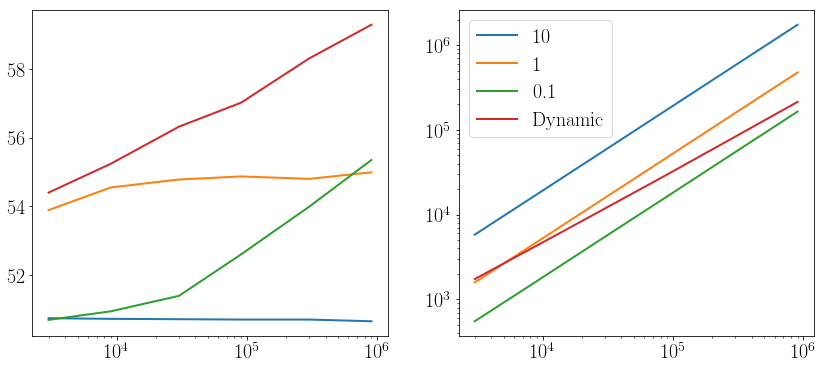

In [6]:
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})


f = plt.figure(figsize=(14, 6))

ax = plt.subplot(121)

ax.set_xscale('log', basex=10)

plt.plot(plot_data[plot_data.percentile == 10].N, plot_data[plot_data.percentile == 10].perc_mc_attack_eps_50, linewidth=2, label='10')
plt.plot(plot_data[plot_data.percentile == 1].N, plot_data[plot_data.percentile == 1].perc_mc_attack_eps_50, linewidth=2, label='1')
plt.plot(plot_data[plot_data.percentile == 0.1].N, plot_data[plot_data.percentile == 0.1].perc_mc_attack_eps_50, linewidth=2, label='0.1')
plt.plot(plot_data[plot_data.percentile == -1].N, plot_data[plot_data.percentile == -1].perc_mc_attack_eps_50, linewidth=2, label='Dynamic')

ax = plt.subplot(122)

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)

plt.plot(plot_data[plot_data.percentile == 10].N, plot_data[plot_data.percentile == 10].t_value, linewidth=2, label='10')
plt.plot(plot_data[plot_data.percentile == 1].N, plot_data[plot_data.percentile == 1].t_value, linewidth=2, label='1')
plt.plot(plot_data[plot_data.percentile == 0.1].N, plot_data[plot_data.percentile == 0.1].t_value, linewidth=2, label='0.1')
plt.plot(plot_data[plot_data.percentile == -1].N, plot_data[plot_data.percentile == -1].t_value, linewidth=2, label='Dynamic')
#plt.fill_between(plot_data.t_value, plot_data.perc_mc_attack_eps_50 - err_plot_data.perc_mc_attack_eps_50, plot_data.perc_mc_attack_eps_50 + err_plot_data.perc_mc_attack_eps_50, facecolor='lightblue', alpha=0.5)
plt.legend()

# Sample Size

Der Nachweis, dass Daten verwendet worden hängt nur von der Anzahl der geleakten Daten ab, nicht davon welche konkret geleakt worden sind

Zwei LEaks verwendet der Angreifer. ;Man kann ihm jeden leak nachweisen

1000 geleakt. Wir sind nur bei 500 sicher. Auch die 500 können wir ihnen nachweisen

In [7]:
data1 = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE_Network_1.csv', dtype=dt))
data2 = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE_Network_2.csv', dtype=dt))
data3 = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE_Network_3.csv', dtype=dt))
data4 = pd.DataFrame(np.loadtxt('MC_ATTACK_CVAE_Network_4.csv', dtype=dt))

In [8]:
data1 = data1[data1.percentile == -1]
data2 = data2[data2.percentile == -1]
data3 = data3[data3.percentile == -1]
data4 = data4[data4.percentile == -1]

In [9]:
stats.f_oneway(data1.perc_mc_attack_eps_50,data2.perc_mc_attack_eps_50,data3.perc_mc_attack_eps_50,data4.perc_mc_attack_eps_50)

F_onewayResult(statistic=0.5684161254461416, pvalue=0.635991396956975)